<a href="https://colab.research.google.com/github/enockmario/ElectionModel/blob/main/Malaria_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
dataset_path = "/content/drive/My Drive/Malaria_Prediction_Kilifi_Balanced.csv"

In [27]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Malaria_Prediction_Kilifi_Balanced.csv')

# Display first few rows
df.head()


,Temperature (°C),Humidity (%),Rainfall (mm),Wind Speed (m/s),Altitude (m),Population Density,Health Facility Access,Previous Malaria Cases,Malaria Incidence
0,20.52,95.02,86.60,2.77,105.72,997,0,881,0
1,34.26,61.98,265.68,5.58,139.30,1719,1,547,1
2,20.10,85.10,175.46,4.92,100.81,1984,1,309,0
3,25.38,94.60,407.23,0.56,484.74,190,1,997,1
4,20.10,85.10,175.46,4.92,100.81,1984,1,309,0


In [28]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Temperature (°C)          0
Humidity (%)              0
Rainfall (mm)             0
Wind Speed (m/s)          0
Altitude (m)              0
Population Density        0
Health Facility Access    0
Previous Malaria Cases    0
Malaria Incidence         0
dtype: int64


In [30]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Remove duplicates if found
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [31]:
# Display column data types
print(df.dtypes)

Temperature (°C)          float64
Humidity (%)              float64
Rainfall (mm)             float64
Wind Speed (m/s)          float64
Altitude (m)              float64
Population Density          int64
Health Facility Access      int64
Previous Malaria Cases      int64
Malaria Incidence           int64
dtype: object


<ipython-input-33-0d881d2ab433>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Malaria Incidence"], palette="coolwarm", edgecolor="black")


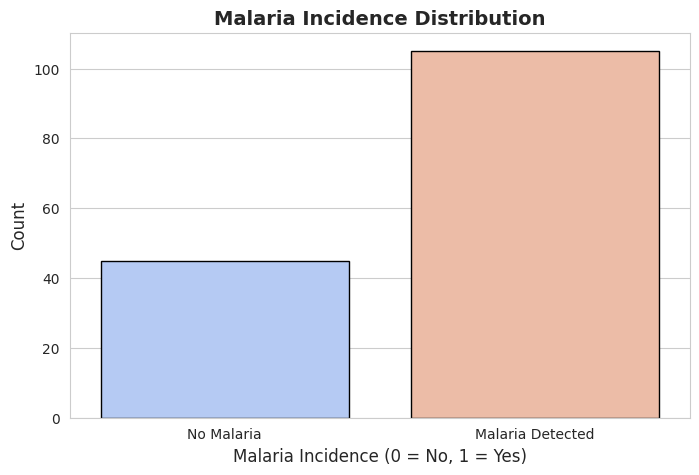

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)  # Set global figure size
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Malaria Incidence"], palette="coolwarm", edgecolor="black")

# Styling
plt.title("Malaria Incidence Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Malaria Incidence (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ["No Malaria", "Malaria Detected"])
plt.show()


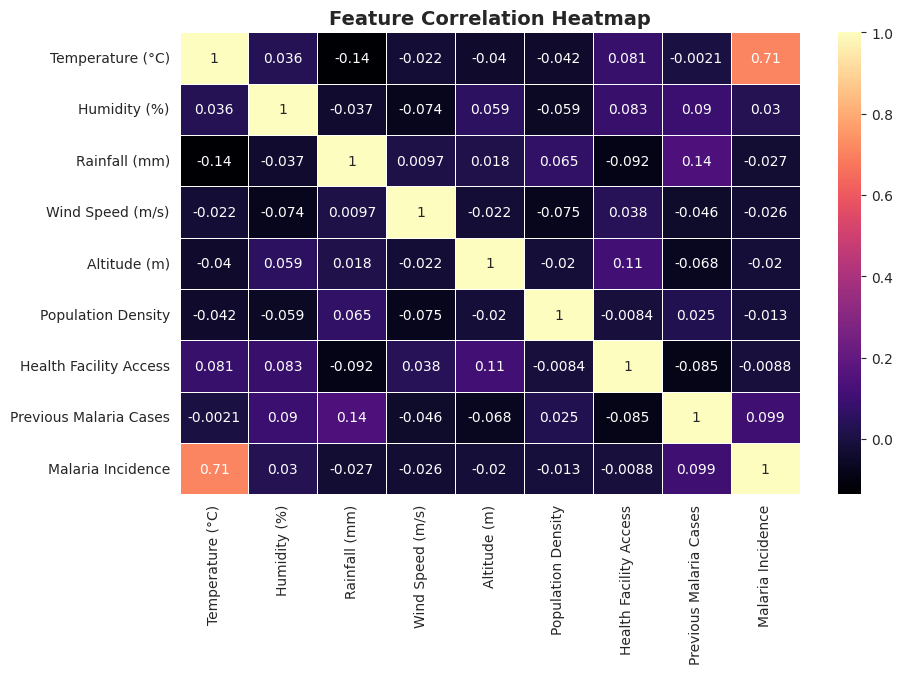

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="magma", linewidths=0.5)

# Styling
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")
plt.show()


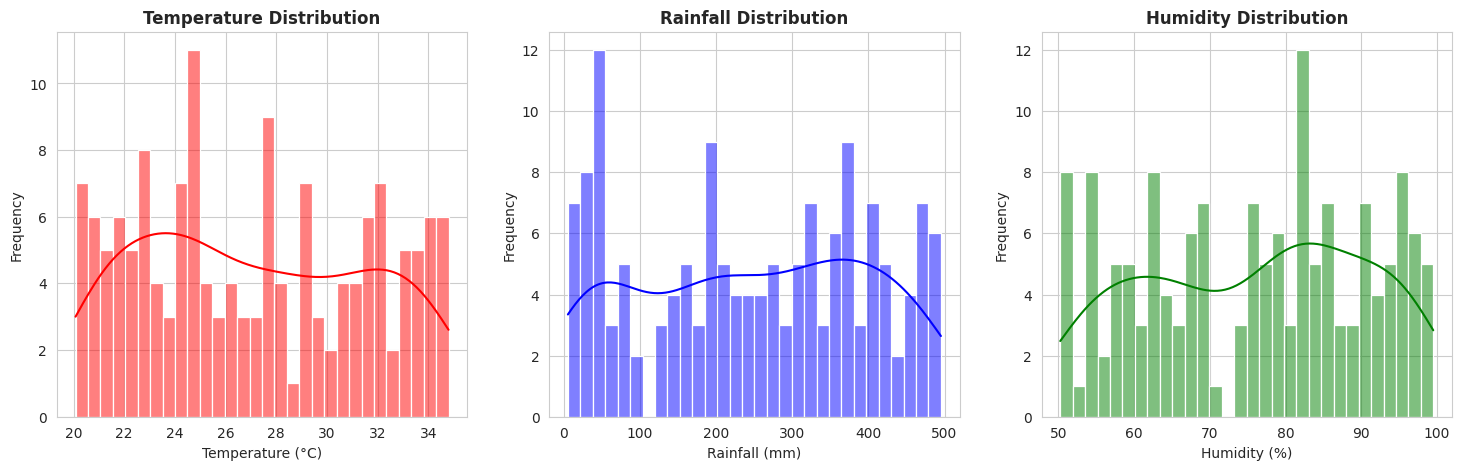

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temperature Distribution
sns.histplot(df["Temperature (°C)"], bins=30, kde=True, color="red", ax=ax[0])
ax[0].set_title("Temperature Distribution", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Temperature (°C)")
ax[0].set_ylabel("Frequency")

# Rainfall Distribution
sns.histplot(df["Rainfall (mm)"], bins=30, kde=True, color="blue", ax=ax[1])
ax[1].set_title("Rainfall Distribution", fontsize=12, fontweight="bold")
ax[1].set_xlabel("Rainfall (mm)")
ax[1].set_ylabel("Frequency")

# Humidity Distribution
sns.histplot(df["Humidity (%)"], bins=30, kde=True, color="green", ax=ax[2])
ax[2].set_title("Humidity Distribution", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Humidity (%)")
ax[2].set_ylabel("Frequency")

plt.show()


<ipython-input-36-6563b9bec2ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Temperature (°C)", data=df, palette="coolwarm", ax=ax[0])
<ipython-input-36-6563b9bec2ee>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Rainfall (mm)", data=df, palette="coolwarm", ax=ax[1])
<ipython-input-36-6563b9bec2ee>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Malaria Incidence", y="Humidity (%)", data=df, palette="coolwarm", ax=ax[2])


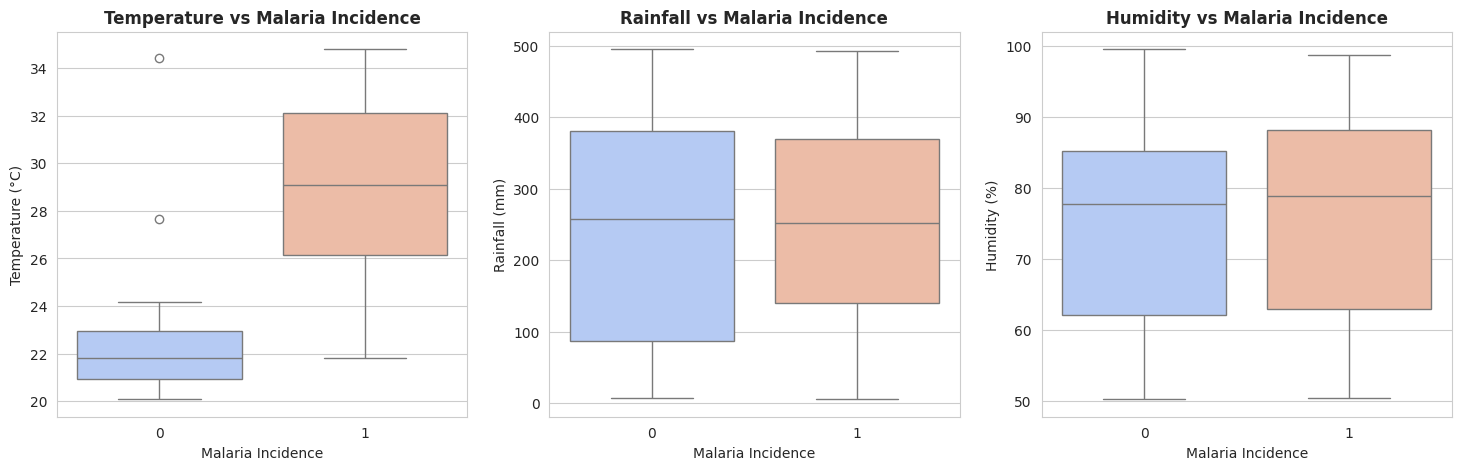

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Temperature (°C)", data=df, palette="coolwarm", ax=ax[0])
ax[0].set_title("Temperature vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[0].set_xlabel("Malaria Incidence")
ax[0].set_ylabel("Temperature (°C)")

# Rainfall vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Rainfall (mm)", data=df, palette="coolwarm", ax=ax[1])
ax[1].set_title("Rainfall vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[1].set_xlabel("Malaria Incidence")
ax[1].set_ylabel("Rainfall (mm)")

# Humidity vs Malaria Incidence
sns.boxplot(x="Malaria Incidence", y="Humidity (%)", data=df, palette="coolwarm", ax=ax[2])
ax[2].set_title("Humidity vs Malaria Incidence", fontsize=12, fontweight="bold")
ax[2].set_xlabel("Malaria Incidence")
ax[2].set_ylabel("Humidity (%)")

plt.show()


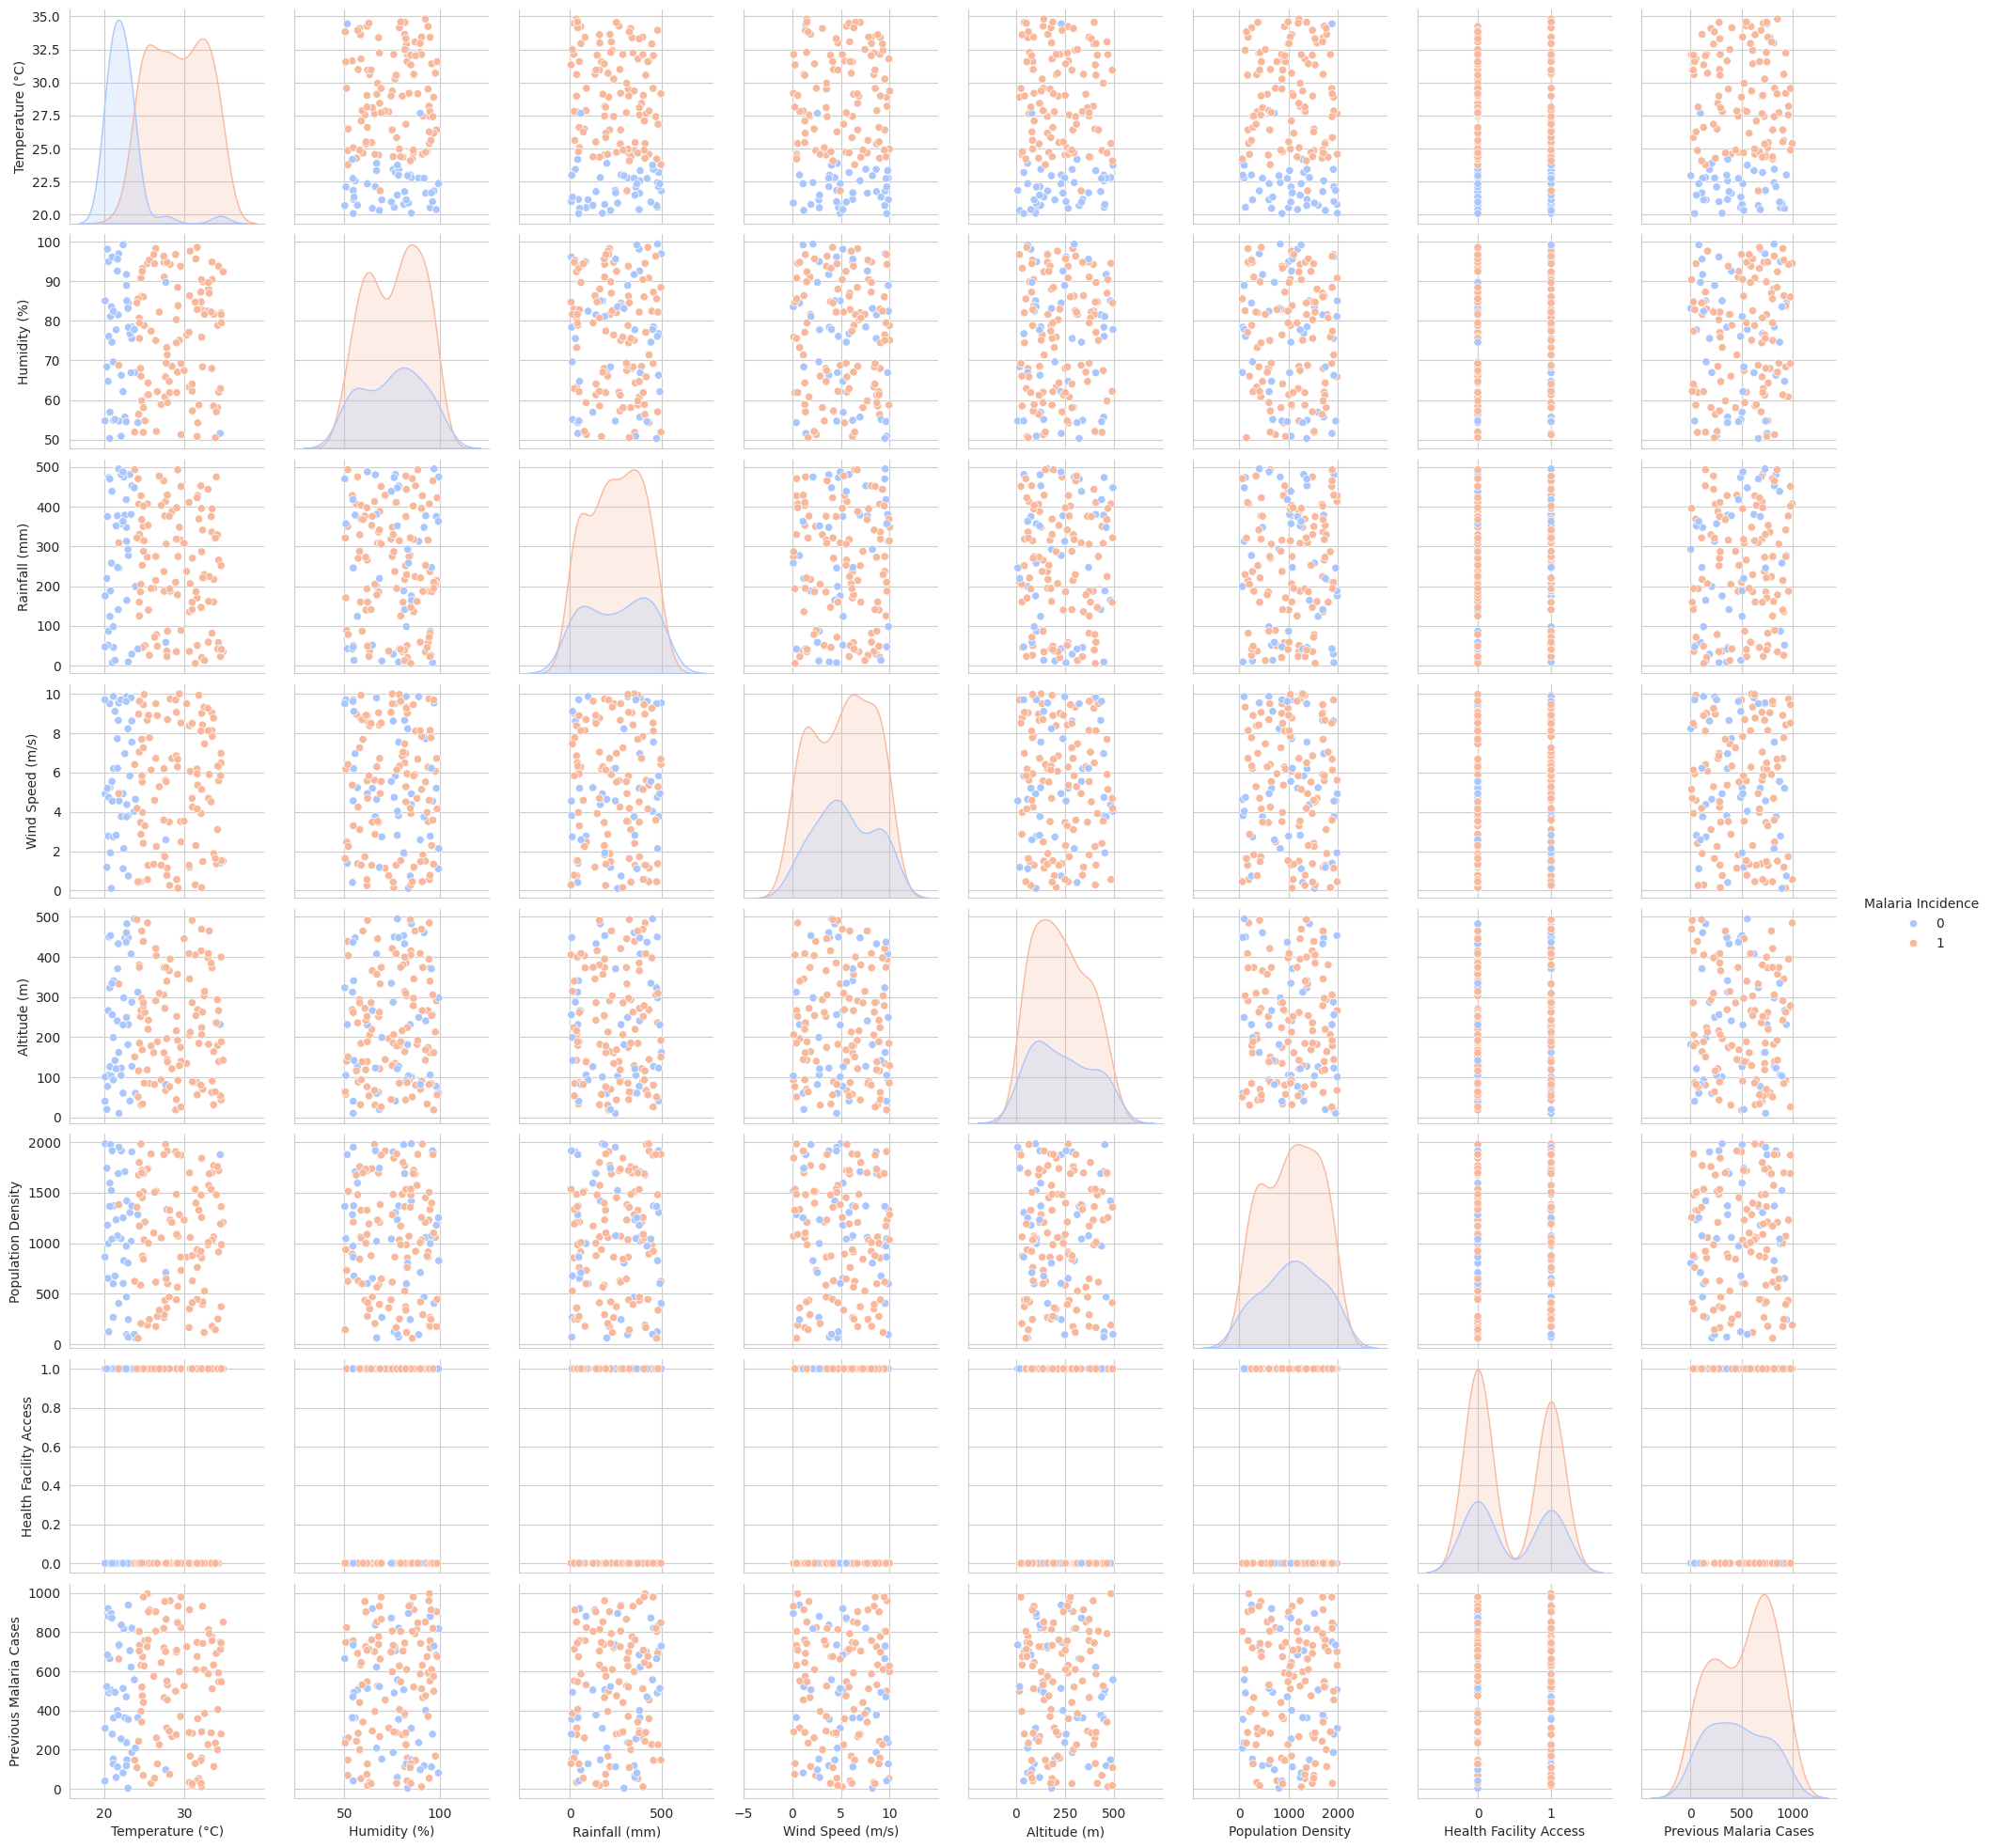

In [37]:
sns.pairplot(df, hue="Malaria Incidence", palette="coolwarm", diag_kind="kde")
plt.show()


In [42]:
from sklearn.model_selection import train_test_split

# Assume X (features) and y (target) are already defined
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset shapes
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Test Set: {X_test.shape}, {y_test.shape}")


Training Set: (90, 8), (90,)
Validation Set: (30, 8), (30,)
Test Set: (30, 8), (30,)


In [43]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on validation set
y_pred_val_log = log_reg.predict(X_val)

# Compute accuracy
accuracy_val_log = accuracy_score(y_val, y_pred_val_log)
print("Logistic Regression - Validation Accuracy:", accuracy_val_log)

# Display classification report
print(classification_report(y_val, y_pred_val_log))


Logistic Regression - Validation Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.89      1.00      0.94        17

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



In [45]:
# Predict on test set
y_pred_test_log = log_reg.predict(X_test)

# Compute accuracy
accuracy_test_log = accuracy_score(y_test, y_pred_test_log)
print("Logistic Regression - Test Accuracy:", accuracy_test_log)

# Display classification report
print(classification_report(y_test, y_pred_test_log))


Logistic Regression - Test Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        11
           1       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30



In [100]:
# Increasing min_samples_leaf significantly
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [101]:
# Reducing max_features
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [111]:
# Reducing n_estimators further
rf_model = RandomForestClassifier(n_estimators=10, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=10, random_state=42)

In [116]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)

print("OOB Score:", rf_model.oob_score_)


OOB Score: 0.8666666666666667


In [117]:
# Predict on validation set
y_pred_val_rf = rf_model.predict(X_val)

# Compute accuracy
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print("Random Forest - Validation Accuracy:", accuracy_val_rf)

# Display classification report
print(classification_report(y_val, y_pred_val_rf))


Random Forest - Validation Accuracy: 0.7
              precision    recall  f1-score   support

           0       1.00      0.31      0.47        13
           1       0.65      1.00      0.79        17

    accuracy                           0.70        30
   macro avg       0.83      0.65      0.63        30
weighted avg       0.80      0.70      0.65        30



In [118]:
# Predict on test set
y_pred_test_rf = rf_model.predict(X_test)

# Compute accuracy
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Random Forest - Test Accuracy:", accuracy_test_rf)

# Display classification report
print(classification_report(y_test, y_pred_test_rf))


Random Forest - Test Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        11
           1       0.66      1.00      0.79        19

    accuracy                           0.67        30
   macro avg       0.83      0.55      0.48        30
weighted avg       0.78      0.67      0.56        30



In [121]:
train_acc_log = accuracy_score(y_train, log_reg.predict(X_train))
val_acc_log = accuracy_score(y_val, y_pred_val_log)
test_acc_log = accuracy_score(y_test, y_pred_test_log)

train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train))
val_acc_rf = accuracy_score(y_val, y_pred_val_rf)
test_acc_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Logistic Regression - Training Accuracy: {train_acc_log:.4f}")
print(f"Logistic Regression - Validation Accuracy: {val_acc_log:.4f}")
print(f"Logistic Regression - Test Accuracy: {test_acc_log:.4f}\n")

print(f"Random Forest - Training Accuracy: {train_acc_rf:.4f}")
print(f"Random Forest - Validation Accuracy: {val_acc_rf:.4f}")
print(f"Random Forest - Test Accuracy: {test_acc_rf:.4f}")


Logistic Regression - Training Accuracy: 0.9444
Logistic Regression - Validation Accuracy: 0.9333
Logistic Regression - Test Accuracy: 0.9333

Random Forest - Training Accuracy: 0.9222
Random Forest - Validation Accuracy: 0.7000
Random Forest - Test Accuracy: 0.6667


In [122]:
if test_acc_rf > test_acc_log:
    print("🎯 Random Forest performs better!")
else:
    print("🎯 Logistic Regression performs better!")

🎯 Logistic Regression performs better!


In [123]:
import joblib

# Save the trained Logistic Regression model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

print("✅ Model saved successfully!")


✅ Model saved successfully!


In [125]:
!pip install flask flask-cors joblib scikit-learn pandas numpy


In [135]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np
from flask_cors import CORS
from flask_ngrok import run_with_ngrok

# Initialize Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Allow Ngrok to tunnel the app

# Load the trained model
model = joblib.load("logistic_regression_model.pkl")

@app.route("/", methods=["GET"])
def home():
    return jsonify({"message": "Welcome to the Malaria Prediction API!"})

@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from request
        data = request.get_json()

        # Extract the feature values
        features = np.array(data["features"]).reshape(1, -1)

        # Make a prediction
        prediction = model.predict(features)

        # Convert output into a human-readable response
        result = "Malaria Positive" if prediction[0] == 1 else "Malaria Negative"

        return jsonify({"prediction": result})

    except Exception as e:
        return jsonify({"error": str(e)})

# Start the server
if __name__ == "__main__":
    app.run()



Overwriting app.py


In [136]:
!pip install flask-ngrok



In [132]:
!wget -nc https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip
!./ngrok authtoken 2uA137QWEgLR2UVsJVPPq0qg7wh_ex3sBFJ9Gw4BWM2XUeRz

File ‘ngrok-stable-linux-amd64.zip’ already there; not retrieving.

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!./ngrok http 5000
